<a href="https://colab.research.google.com/github/Aline-Castro/Desafio-Cientista-de-Dados-Incidium/blob/main/LH_CD_ALINE_CASTRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DESAFIO CIENTISTA DE DADOS
## INCIDIUM / LIGHTHOUSE

###### Autora: Aline de Castro Santos
###### Data: Fevereiro de 2024



# **1. INTRODUÇÃO**

>Este projeto de ciência de dados foi desenvolvido para abordar um desafio proposto pela Indicium, uma empresa que está trabalhando na criação de uma plataforma de aluguéis temporários na cidade de Nova York. O objetivo principal é desenvolver um modelo preditivo para prever os preços dos aluguéis com base em um conjunto de dados fornecido.

>Este projeto é uma oportunidade para explorar conceitos estatísticos de modelos preditivos, aplicar criatividade na resolução de problemas e utilizar modelos básicos de machine learning.



## **1.1 A base de dados**

> O conjunto de dados, denominado `teste_indicium_precificacao.csv`, contém informações detalhadas sobre os anúncios de aluguel, incluindo características como localização, tipo de quarto, preço por noite, número mínimo de noites, número de comentários, entre outros. A análise desses dados permitirá a criação de um modelo que pode prever os preços dos aluguéis, o que é crucial para a estratégia de precificação da plataforma.





## 1.2 Descrição das variáveis

- `id`: Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo.
- `nome`: Representa o nome do anúncio.
- `host_id`: Representa o id do usuário que hospedou o anúncio.
- `host_name`: Contém o nome do usuário que hospedou o anúncio.
- `bairro_group`: Contém o nome do bairro onde o anúncio está localizado.
- `bairro`: Contém o nome da área onde o anúncio está localizado.
- `latitude`: Contém a latitude do local.
- `longitude`: Contém a longitude do local.
- `room_type`: Contém o tipo de espaço de cada anúncio.
- `price`: Contém o preço por noite em dólares listado pelo anfitrião.
- `minimo_noites`: Contém o número mínimo de noites que o usuário deve reservar.
- `numero_de_reviews`: Contém o número de comentários dados a cada listagem.
- `ultima_review`: Contém a data da última revisão dada à listagem.
- `reviews_por_mes`: Contém o número de avaliações fornecidas por mês.
- `calculado_host_listings_count`: Contém a quantidade de listagem por host.
- `disponibilidade_365`: Contém o número de dias em que o anúncio está disponível para reserva.


# **2. BIBLIOTECAS NECESSÁRIAS**

In [129]:
# Importando as bibliotecas necessárias

import pandas as pd  # Para manipulação e análise de dados estruturados em tabelas
import numpy as np  # Para realizar operações matemáticas e manipular arrays multidimensionais
import matplotlib.pyplot as plt  # Para criação de gráficos estáticos, animados e interativos em 2D
import seaborn as sns  # Para criação de gráficos estatísticos mais atraentes e informativos baseados em Matplotlib
import scipy.stats as stats  # Para realizar cálculos estatísticos e operações matemáticas avançadas
import plotly.express as px  # Para criação de gráficos interativos de alto nível
import plotly.subplots as sp  # Para criação de subplots em gráficos Plotly
import plotly.graph_objs as go  # Para criação de gráficos Plotly de baixo nível com mais controle sobre o design
import statsmodels.formula.api as smf  # Para criação de modelos estatísticos e execução de testes estatísticos usando fórmulas
import statsmodels.api as sm  # Para acesso a funções estatísticas completas e modelos estatísticos
from wordcloud import WordCloud  # Para visualização de dados de texto através de nuvens de palavras
from sklearn.model_selection import train_test_split  # Para dividir dados em conjuntos de treinamento e teste
from sklearn.linear_model import LinearRegression  # Para realizar regressão linear e modelar relações entre variáveis
from sklearn.metrics import mean_squared_error  # Para calcular o erro quadrático médio, uma métrica de avaliação de modelo
import pickle  # Para serializar e desserializar objetos Python, permitindo que os objetos sejam salvos e carregados
from sklearn.ensemble import RandomForestRegressor # Para realizar Random Forest, um método de aprendizado de máquina
from sklearn.impute import SimpleImputer  # Para preencher valores ausentes nos dados
from sklearn.model_selection import GridSearchCV # Para ajustar os hiperparâmetros
import warnings

# Ignorar os avisos de desempenho do pandas
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

# Configuração para exibir gráficos diretamente no notebook
%matplotlib inline

# **3. CARREGANDO A BASE DE DADOS**

In [130]:
# Carregando os dados
df = pd.read_csv('teste_indicium_precificacao.csv')

# Visualização das primeiras cinco linhas do DataFrame
df.head()


id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150              3                  0           NaN   
2  Entire home/apt     89              1                270    2019-07-05   
3  Entire home/apt     80             10                  9    2018-11-19   
4  Entire home/apt    200              3                 74    2019-06-22   

   reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0             0.38                              2                  355  
1              NaN                              1                  365  
2             4.64                              1                  194  
3             0.10                              1                    0  
4             0.59                              1                  129

# **4. ANÁLISE EXPLORATÓRIA DOS DADOS**

## **4.1 Descrição dos dados**

In [131]:
# Informações gerais sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [132]:
# Descrição estatística das variáveis numéricas
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         0.010000   
25%         1.000000           1.000000         0.190000   
50%         3.000000           5.000000         0.720000   
75%         5.000000          24.000000         2.020000   
max      1250.000000         629.000000        58.500000   

       calculado_host_listings_count  disponibilidade_365  
count                   48894.000000         48894.000000  
mean                        7.144005           112.776169  
std                        32.952855           131.618692  
min                         1.000000             0.000000  
25%                         1.000000             0.000000  
50%                         1.000000            45.000000  
75%                         2.000000           227.000000  
max                       327.000000           365.000000

In [133]:
# Dimensionalidade do DataFrame (número de linhas, número de colunas)
df.shape

(48894, 16)

In [134]:
# Número de valores nulos em cada coluna
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

As colunas *'nome'* e *'host_name'* serão substituídas por *'Desconhecido'* e a coluna *'reviews_por_mes'* será substituída por *0*.
> Essa substituição é realizada porque *'nome'* e *'host_name'* são variáveis categóricas e a substituição por *'Desconhecido'* permite manter a integridade dos dados sem adicionar informações tendenciosas.
> Para a coluna *'reviews_por_mes'*, a substituição por 0 é justificada pelo fato de que a ausência de uma revisão pode ser interpretada como nenhuma revisão feita naquele mês, portanto, *0* é um valor adequado.

In [135]:
# Substituindo valores nulos
df['nome'].fillna('Desconhecido', inplace=True)
df['host_name'].fillna('Desconhecido', inplace=True)
df['reviews_por_mes'].fillna(0, inplace=True)

A coluna *'ultima_review'* contém datas, mas é do tipo *'object'*.
>Para facilitar a manipulação e análise desses dados, esta coluna será convertida para o tipo de dados *datetime*.

In [136]:
# Convertendo a coluna 'ultima_review' para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'])

In [137]:
# Verificando os tipos de dados de cada coluna
df.dtypes

id                                        int64
nome                                     object
host_id                                   int64
host_name                                object
bairro_group                             object
bairro                                   object
latitude                                float64
longitude                               float64
room_type                                object
price                                     int64
minimo_noites                             int64
numero_de_reviews                         int64
ultima_review                    datetime64[ns]
reviews_por_mes                         float64
calculado_host_listings_count             int64
disponibilidade_365                       int64
dtype: object

## **4.2 Matriz de correlação**

In [138]:
# Correlação entre variáveis
# Gerando um mapa de calor da matriz de correlação
fig = px.imshow(df.corr(), color_continuous_scale='viridis', title='Matriz de Correlação')
# Mostrando a figura
fig.show()



<ipython-input-138-8e16e2d5a44a>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [139]:
# Calculando a correlação entre as variáveis
corr = df.corr()
corr

<ipython-input-139-c6d3149c1dd4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



id   host_id  latitude  longitude  \
id                             1.000000  0.588282 -0.003178   0.090896   
host_id                        0.588282  1.000000  0.020199   0.127049   
latitude                      -0.003178  0.020199  1.000000   0.084777   
longitude                      0.090896  0.127049  0.084777   1.000000   
price                          0.010618  0.015309  0.033939  -0.150020   
minimo_noites                 -0.013235 -0.017370  0.024861  -0.062750   
numero_de_reviews             -0.319782 -0.140113 -0.015399   0.059092   
reviews_por_mes                0.180208  0.209776 -0.018775   0.138512   
calculado_host_listings_count  0.133274  0.154951  0.019517  -0.114713   
disponibilidade_365            0.085541  0.203535 -0.010926   0.082751   

                                  price  minimo_noites  numero_de_reviews  \
id                             0.010618      -0.013235          -0.319782   
host_id                        0.015309      -0.017370          -0.140113   
latitude                       0.033939       0.024861          -0.015399   
longitude                     -0.150020      -0.062750           0.059092   
price                          1.000000       0.042799          -0.047954   
minimo_noites                  0.042799       1.000000          -0.080118   
numero_de_reviews             -0.047954      -0.080118           1.000000   
reviews_por_mes               -0.050564      -0.124909           0.589406   
calculado_host_listings_count  0.057472       0.127960          -0.072376   
disponibilidade_365            0.081833       0.144320           0.172047   

                               reviews_por_mes  calculado_host_listings_count  \
id                                    0.180208                       0.133274   
host_id                               0.209776                       0.154951   
latitude                             -0.018775                       0.019517   
longitude                             0.138512                      -0.114713   
price                                -0.050564                       0.057472   
minimo_noites                        -0.124909                       0.127960   
numero_de_reviews                     0.589406                      -0.072376   
reviews_por_mes                       1.000000                      -0.047313   
calculado_host_listings_count        -0.047313                       1.000000   
disponibilidade_365                   0.163760                       0.225711   

                               disponibilidade_365  
id                                        0.085541  
host_id                                   0.203535  
latitude                                 -0.010926  
longitude                                 0.082751  
price                                     0.081833  
minimo_noites                             0.144320  
numero_de_reviews                         0.172047  
reviews_por_mes                           0.163760  
calculado_host_listings_count             0.225711  
disponibilidade_365                       1.000000

Algumas observações baseadas na matriz de correlação entre diferentes variáveis no conjunto de dados:

- `id` e `host_id` têm uma correlação positiva moderada (0.588282), o que indica que os IDs dos anúncios e dos anfitriões podem estar de alguma forma relacionados.
- `numero_de_reviews` e `reviews_por_mes` têm uma forte correlação positiva (0.589406), o que faz sentido, pois um maior número de revisões por mês provavelmente levará a um maior número total de revisões.
- `longitude` e `price` têm uma correlação negativa moderada (-0.150020), o que pode indicar que os preços tendem a ser menores em áreas com longitudes maiores. No entanto, essa relação pode não ser direta e pode ser influenciada por outros fatores, como o bairro ou o tipo de quarto.
- `disponibilidade_365` tem uma correlação positiva moderada com `calculado_host_listings_count` (0.225711) e `host_id` (0.203535), o que pode sugerir que anfitriões com mais listagens ou anfitriões mais antigos na plataforma tendem a ter suas listagens disponíveis por mais dias no ano.



## **4.3 Visualização da distribuição dos dados**


### 4.3.1 Distribuição de dados das variáveis numéricas


>Histogramas para cada variável numérica (‘price’, ‘minimo_noites’, ‘numero_de_reviews’, ‘reviews_por_mes’, ‘calculado_host_listings_count’, ‘disponibilidade_365’),  para entender a distribuição dos dados

In [140]:
# Verificando a distribuição do preço por noite
fig1 = px.histogram(df, x='price', nbins=30, title='Distribuição de Preços')
fig1.update_layout(xaxis_title='Preço', yaxis_title='Frequência')
fig1.show()

A partir do gráfico, pode-se observar que a maioria dos preços está concentrada no extremo inferior da escala. Há uma frequência muito alta de aluguéis com preços próximos entre 0 e 499 dolares.
> Isso sugere que a maioria dos imóveis tem preços baixos.

In [141]:
# Verificando a quantidade de  mínimo de noites que o usuário deve reservar
fig2 = px.histogram(df, x='minimo_noites', nbins=30, title='Distribuição de Mínimo de Noites')
fig2.update_layout(xaxis_title='Mínimo de Noites', yaxis_title='Frequência')
fig2.show()


A partir do gráfico, pode-se observar que a maioria das reservas exige um número muito baixo de noites mínimas. Há uma frequência muito alta de estadias com um requisito de noites mínimas entre 0 e 49.
> Isso sugere que a maioria dos imóveis tem requisitos de estadia mínima baixos.

In [142]:
# Verificando o número de comentários dados a cada listagem
fig3 = px.histogram(df, x='numero_de_reviews', nbins=30, title='Distribuição de Número de Reviews')
fig3.update_layout(xaxis_title='Número de Reviews', yaxis_title='Frequência')
fig3.show()


A partir do gráfico, podemos observar que a maioria dos imóveis tem um número muito baixo de reviews. Há uma frequência muito alta de reviews entre 0 e 49.
> Isso sugere que a maioria dos imóveis tem poucos reviews.

In [143]:
# Verificando o número de avaliações fornecidas por mês
fig4 = px.histogram(df, x='reviews_por_mes', nbins=30, title='Distribuição de Reviews por Mês')
fig4.update_layout(xaxis_title='Reviews por Mês', yaxis_title='Frequência')
fig4.show()


A partir do gráfico, podemos observar que a maioria dos imóveis tem um número muito baixo de reviews por mês. Há uma frequência muito alta de reviews por mês entre 0 e 99. Isso sugere que a maioria dos imóveis recebe poucos reviews por mês.

In [144]:
# Verificando a quantidade de listagem por host
fig5 = px.histogram(df, x='calculado_host_listings_count', nbins=30, title='Distribuição de Listagens do Host Calculadas')
fig5.update_layout(xaxis_title='Listagens do Host Calculadas', yaxis_title='Frequência')
fig5.show()


Pode-se observar que a maioria dos hosts tem um número muito baixo de listagens calculadas. Há uma frequência muito alta de hosts com um número de listagens entre 0 e 19.
> Isso sugere que a maioria dos hosts tem poucas listagens.

In [145]:
# Dias em que o anúncio está disponível para reserva
fig6 = px.histogram(df, x='disponibilidade_365', nbins=30, title='Distribuição de Disponibilidade 365')
fig6.update_layout(xaxis_title='Disponibilidade 365', yaxis_title='Frequência')
fig6.show()

Nota-se que a maioria dos imóveis tem uma disponibilidade muito baixa ou muito alta ao longo de um ano. Há uma frequência muito alta de imóveis com uma disponibilidade próxima a 0 e outra frequência alta próxima a 350 dias.
> Isso sugere que a maioria dos imóveis ou está disponível quase o ano todo ou raramente está disponível.

### 4.3.2 Distribuição Geográfica dos Imóveis

In [146]:
# Distribuição Geográfica dos Imóveis com indicação dos preços
fig7 = px.scatter_mapbox(df,
                        lat='latitude',
                        lon='longitude',
                        color='price',
                        size='price',
                        color_continuous_scale='viridis',
                        title='Distribuição Geográfica dos Imóveis',
                        mapbox_style="carto-positron")

fig7.show()


A imagem mostra um mapa de distribuição geográfica das propriedades, indicando seus preços. O mapa mostra partes de Nova Jersey e Nova York, incluindo cidades como Newark e Elizabeth.

As propriedades são representadas por pontos coloridos que estão codificados de acordo com a escala de preços indicada à direita. A escala de cores varia de roxo (preço baixo) a amarelo (preço alto).

A partir deste mapa, pode-se visualizar a distribuição geográfica das propriedades e ter uma ideia geral dos preços em diferentes áreas.

In [147]:
# Gráfico de dispersão para longitude e price
fig8 = px.scatter(df, x='longitude', y='price', title='Correlação entre longitude e price')
fig8.update_layout(xaxis_title='longitude', yaxis_title='price')
fig8.show()

Há uma concentração de dados em torno da faixa de preço mais baixa, particularmente entre as longitudes de aproximadamente -74 e -73,9.
> Indica que a longitude tem algum impacto significativo no preço.

In [148]:
# Gráfico de dispersão para latitude e price
fig9 = px.scatter(df, x='latitude', y='price', title='Correlação entre latitude e price')
fig9.update_layout(xaxis_title='latitude', yaxis_title='price')
fig9.show()

A partir do gráfico, observa-se que a maioria dos pontos de dados está concentrada na extremidade inferior da faixa de preço, indicando que muitos aluguéis têm preços relativamente baixos. Além disso, não parece haver uma correlação forte entre a latitude e o preço, pois os pontos de dados estão amplamente dispersos.
>Isso sugere que a latitude, por si só, pode não ser um bom indicador do preço.

### 4.3.3 Comparação entre variáveis

In [149]:
# Calculando o preço médio por bairro
preco_medio_por_bairro = df.groupby('bairro')['price'].mean().reset_index()

# Ordenando os dados
preco_medio_por_bairro = preco_medio_por_bairro.sort_values('price', ascending=False)

# Criando o gráfico de barras
fig10 = px.bar(preco_medio_por_bairro, x='bairro', y='price', title='Preço médio por bairro')
fig10.show()

 Há uma ampla gama de preços médios entre diferentes bairros. Alguns bairros têm preços médios significativamente mais altos em comparação com outros, como, por exemplo, Fort Wadsworth. Isso pode ser devido a vários fatores, como localização, comodidades, demanda, etc.

In [150]:
# Boxplot por tipo de quarto
fig11 = px.box(df, x='room_type', y='price', title='Preços por Tipo de Quarto')
fig11.update_layout(xaxis_title='Tipo de Quarto', yaxis_title='Preço')
fig11.show()


A visualização da distribuição de preços para três tipos diferentes de quartos indica que:
  - **Casa/Apto inteiro:** A mediana do preço está em torno de 2k. Existem muitos outliers que se estendem até aproximadamente 10k.
  - **Quarto privado:** A mediana do preço é menor do que a de casas/apartamentos inteiros, mas também tem outliers que se estendem até aproximadamente 8k.
  - **Quarto compartilhado:** Tem o menor preço mediano com menos outliers e de menor valor em comparação com as outras duas categorias.

Com base nesta análise do boxplot:
- A Casa/Apto inteiro normalmente custa mais, com uma mediana de preço mais alta e outliers mais caros.
- Os quartos privados geralmente são mais baratos do que alugar uma casa ou apartamento inteiro, mas ainda podem ser bastante caros, como indicado por vários outliers de alto valor.
- Os quartos compartilhados são a opção mais barata, com uma baixa mediana de preço e outliers de baixo valor.



In [151]:
# Análise de disponibilidade
fig12 = px.scatter(df, x='disponibilidade_365', y='price', title='Disponibilidade x Preço')
fig12.update_layout(xaxis_title='Disponibilidade (em dias)', yaxis_title='Preço')
fig12.show()


A maioria dos pontos de dados está concentrada na faixa de preço mais baixa, especialmente entre 0-2k. Há uma concentração notável de pontos de dados nos dias de disponibilidade mais baixos, particularmente entre 0 e 50 dias. À medida que a disponibilidade aumenta, a densidade de pontos de dados diminui, mas ainda é significativa até cerca de 150 dias. Existem pontos de dados esporádicos além dessa faixa, com um pequeno aglomerado aparecendo novamente em torno de 300-350 dias.

> A presença de outliers em preços mais altos sugere variabilidade na precificação para itens com durações de disponibilidade semelhantes. Isso indica que outros fatores, além da disponibilidade, podem estar influenciando o preço.

## **4.4 Outliers**

### 4.4.1 Visualização de **Outliers**

In [152]:
# Análise de outliers na disponibilidade de noites
fig13 = px.box(df, y='disponibilidade_365', title='Boxplot para Disponibilidade_365')
fig13.update_layout(yaxis_title='Dias')
fig13.show()

Análise de outliers na variável disponibilidade_365:

> As “antenas” acima e abaixo da caixa mostram a variabilidade fora dos quartis superior e inferior, portanto, os pontos fora dessas antenas são considerados como outliers. Neste caso, *nenhum outlier é visível*.

In [153]:
# Análise de outliers nos preços
fig14 = px.box(df, y='price', title='Boxplot para Preços')
fig14.update_layout(yaxis_title='Preço')
fig14.show()


**Análise do boxplot para Outliers:**
* Concentração de Dados: <br> A maioria dos preços está concentrada na faixa inferior, como indicado pela posição da caixa perto da parte inferior do gráfico. Isso sugere que a maioria dos preços está na faixa de 0 a 2.000.

* Outliers: <br> Existem vários pontos de dados (outliers) que estão significativamente acima da “antena” superior do boxplot, chegando perto de 10.000. Isso indica que existem algumas listagens com preços muito mais altos do que a maioria.

* Variação de Preços: <br> A presença de outliers sugere uma grande variação nos preços. Isso pode ser devido a uma variedade de fatores, como localização, tipo de propriedade, comodidades, etc.

### 4.4.2 Tratamento dos outliers

> Os outliers podem ser tratados de várias maneiras, dependendo do contexto. No caso dos preços de alugéis, pode haver quartos extremamente caros que são considerados “luxuosos” ou “premium”. Esses quartos podem ser considerados outliers, mas são válidos e representam uma parte importante do mercado. Neste caso, os outliers serão mantidos por enquanto.

# **5. HIPÓTESES DE NEGÓCIOS**

## 5.1.	Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

In [154]:
# Maior número de reviews pode indicar maior confiança dos usuários e possivelmente preços mais altos.
fig15 = px.scatter(df, x='numero_de_reviews', y='price', title='Relação entre Número de Reviews e Preços')
fig15.show()

Analisando a partir da distribuição dos pontos:

* **Concentração de Pontos**: Há uma notável concentração de pontos de dados perto da origem, indicando muitos itens com poucas avaliações e preços baixos.

* **Amplitude de Preços:** Os itens com menos avaliações tendem a ter uma maior amplitude de preços, incluindo alguns dos preços mais altos mostrados no gráfico.

* **Número de Reviews:** À medida que o número de avaliações aumenta, a amplitude de preços se estreita significativamente, e os itens geralmente têm preços mais baixos.

> Em geral, com base nesta análise do gráfico, os locais com menos avaliações podem ter preços mais variados, enquanto os itens com mais avaliações tendem a ter preços mais consistentes e geralmente mais baixos.

In [155]:
# Calculando a média de reviews_por_mes para cada bairro
media_por_bairro = df.groupby('bairro')['reviews_por_mes'].mean().reset_index()

# Ordenando os dados
media_por_bairro = media_por_bairro.sort_values('reviews_por_mes', ascending=False)

# Visualizando o número total de avaliações por bairro
fig16 = px.bar(media_por_bairro, x='bairro', y='reviews_por_mes', title='Número total de avaliações por bairro')
fig16.show()


In [156]:
# Visualizando a relação entre o número de avaliações por mês e a localização do imóvel
fig17 = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="reviews_por_mes", size="reviews_por_mes",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                        mapbox_style="carto-positron")
fig17.show()

In [157]:
# Calculando a média de reviews_por_mes e price para cada bairro
media_por_bairro = (df.groupby('bairro')[['reviews_por_mes', 'price']].mean().reset_index()).sort_values('reviews_por_mes', ascending=False)

# Visualizando a relação entre o preço, as avaliações e o bairro
fig18 = px.scatter(media_por_bairro, x='reviews_por_mes', y='price', color='bairro', title='Relação entre preço, avaliação e bairro')
fig18.show()


In [158]:
# Calculando o preço médio e o número total de avaliações por mês por bairro
media_por_bairro = df.groupby('bairro').agg({'price':'mean', 'reviews_por_mes':'sum'}).reset_index()

# Ordenando os bairros pelo número total de avaliações e pelo preço médio
media_por_bairro = media_por_bairro.sort_values(['reviews_por_mes', 'price'], ascending=[False, True])

# Exibindo os 10 bairros mais recomendados para investimento
media_por_bairro.head(10)


bairro       price  reviews_por_mes
13   Bedford-Stuyvesant  107.678244          4874.52
214        Williamsburg  143.802806          3475.77
94               Harlem  118.974041          2956.23
95       Hell's Kitchen  204.794178          2818.79
28             Bushwick   84.800406          2632.51
64         East Village  186.083108          1668.40
61          East Harlem  133.198747          1579.06
51        Crown Heights  112.480179          1560.82
201     Upper East Side  188.948276          1523.66
202     Upper West Side  210.918316          1487.27

Com base na análise dos gráficos e tabela, **Bedford-Stuyvesant** e **Williamsburg** são os bairros com o maior número de avaliações por mês, o que indica que esses locais são muito populares entre os usuários. Além disso, o preço médio desses bairros é relativamente baixo, o que pode torná-los atraentes.

> Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, **Bedford-Stuyvesant** e **Williamsburg** são os mais indicados.

## 5.2.	O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

### 5.2.1 Correlação

In [159]:
# Calculando correlação entre o número mínimo de noites, a disponibilidade ao longo do ano e o preço.
correlation = df[['minimo_noites', 'disponibilidade_365', 'price']].corr()
correlation


minimo_noites  disponibilidade_365     price
minimo_noites             1.000000             0.144320  0.042799
disponibilidade_365       0.144320             1.000000  0.081833
price                     0.042799             0.081833  1.000000

### 5.2.2 Regressão linear

In [160]:
# Ajustar a regressão linear múltipla
modelo = smf.ols(formula='price ~ minimo_noites + disponibilidade_365', data=df).fit()

# Imprimir os resultados
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     189.1
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.51e-82
Time:                        20:41:52   Log-Likelihood:            -3.3719e+05
No. Observations:               48894   AIC:                         6.744e+05
Df Residuals:                   48891   BIC:                         6.744e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             134.2164    

### 5.2.3 Análise da relação entre 'mínimo de noites' e 'disponibilidade ao longo do ano'



**Correlação:** A correlação entre o número mínimo de noites e o preço é 0.042799, e entre a disponibilidade ao longo do ano e o preço é 0.081833. Ambos são valores de correlação positivos, mas muito baixos, indicando que há uma relação positiva muito fraca entre essas variáveis e o preço.
<br>
<br>
**R-squared:** O valor R-squared de 0.008 indica que apenas 0.8% da variação no preço pode ser explicada pelo número mínimo de noites e pela disponibilidade ao longo do ano. Isso sugere que essas variáveis têm uma influência muito pequena no preço.
<br>
<br>
**Coeficientes:** O coeficiente para o número mínimo de noites é 0.3706, o que significa que para cada aumento de uma noite no número mínimo de noites, o preço aumenta em média 0.3706 dólares, mantendo todas as outras variáveis constantes. O coeficiente para a disponibilidade ao longo do ano é 0.1410, o que significa que para cada aumento de um dia na disponibilidade, o preço aumenta em média 0.1410  dólares, mantendo todas as outras variáveis constantes. O intercepto é 134.2164, que seria o preço quando o número mínimo de noites e a disponibilidade ao longo do ano são zero.
<br>
<br>
**P>|t|:** Os valores p para o número mínimo de noites e a disponibilidade ao longo do ano são 0.000, o que é menor que 0.05, indicando que ambas as variáveis têm um efeito significativo no preço, de acordo com este modelo.
<br>
<br>
**Durbin-Watson:** O valor de Durbin-Watson de 1.839 está próximo de 2, o que sugere que não há autocorrelação significativa nos resíduos.
<br>
<br>
**Jarque-Bera (JB):** O teste Jarque-Bera testa se os dados têm a skewness e kurtosis correspondentes a uma distribuição normal. Um valor p de 0.00 rejeita a hipótese de normalidade.

> Com base na análise das métricas, *não há autocorrelação significativa* entre as duas variáveis em relação ao preço.

## 5.3 Existe algum padrão no texto do nome do local para lugares de mais alto valor?

O uso de mapa de palavras será aplicado neste caso, separando os preços em ranges e plotando um mapa de palavras para cada range

In [161]:
# 'nome' e 'price' são as colunas correspondentes ao nome do local e ao preço, respectivamente
# Definindo os ranges de preço
bins = [0, 100, 200, 500, 1000, 2000, np.inf]  # Usando np.inf como o último bin
labels = ['0-100', '101-200', '201-500', '501-1000', '1001-2000', '2000+']

# Criando uma nova coluna no DataFrame para o range de preço
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

### 5.3.1 Faixa de 0 a 100 dólares



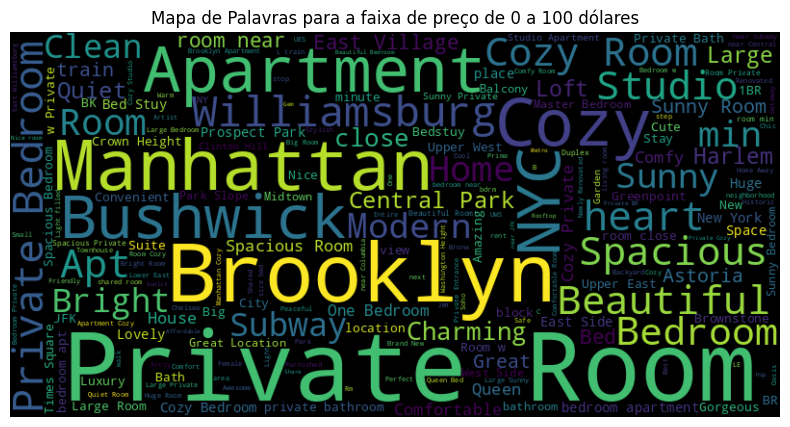

In [162]:
# Filtrando o DataFrame para apenas os locais nesse range de preço
df_filtered = df[df['price_range'] == '0-100']

# Juntando todos os nomes dos locais em uma única string
text = ' '.join(df_filtered['nome'])

# Criando o mapa de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrando o mapa de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palavras para a faixa de preço de 0 a 100 dólares')
plt.show()


A análise do mapa de palavras para a faixa de preço de 0-100 dólares revela padrões distintos que refletem as prioridades e características mais valorizadas pelos anfitriões:


1. **Tema Central:** A frase "Private Room" (Quarto Privado) é exibida de forma proeminente, sugerindo que é o foco principal. Isso indica que a maioria dos anúncios nesta faixa de preço são para quartos privados.

2. **Localizações:** Palavras como "Brooklyn", "Manhattan", "Bushwick" e "Williamsburg" indicam áreas específicas de Nova York onde esses quartos privados podem ser encontrados. Isso sugere que essas áreas podem ter uma maior concentração de quartos privados nesta faixa de preço.

3. **Atributos dos Quartos:** Termos descritivos como "Cozy" (Aconchegante), "Modern" (Moderno), "Sunny" (Ensolarado) e "Spacious" (Espaçoso) descrevem as características dos quartos disponíveis. Isso sugere que, mesmo dentro desta faixa de preço, há uma variedade de quartos disponíveis que podem atender a diferentes preferências e necessidades.

4. **Comodidades e Características:** Palavras como "Balcony" (Varanda), "Bath" (Banho) e "Loft" destacam algumas características ou comodidades que podem acompanhar os quartos. Isso indica que alguns quartos nesta faixa de preço podem oferecer comodidades adicionais.



### 5.3.2 Faixa de 101 a 200 dólares

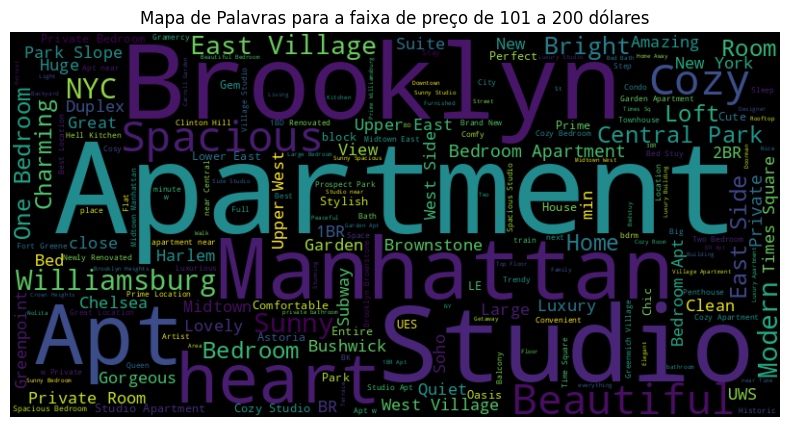

In [163]:
# Filtrando o DataFrame para apenas os locais nesse range de preço
df_filtered = df[df['price_range'] == '101-200']

# Juntando todos os nomes dos locais em uma única string
text = ' '.join(df_filtered['nome'])

# Criando o mapa de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrando o mapa de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palavras para a faixa de preço de 101 a 200 dólares')
plt.show()


A análise do mapa de palavras para a faixa de preço de 101 a 200 dólares revela padrões distintos que refletem as prioridades e características mais valorizadas pelos anfitriões nesta faixa intermediária:

1. **Localizações:** Palavras como "Manhattan" e "Brooklyn" são exibidas de forma proeminente, indicando que essas são áreas populares para propriedades de aluguel nesta faixa de preço. Outras localizações específicas, como "East Side", "West Side", "Williamsburg", "Harlem" e "Central Park", também são mencionadas.

2. **Tipos de Habitação:** Palavras como "Apartment" (Apartamento), "Studio" (Estúdio) e "Loft" sugerem diferentes tipos de espaços de vida disponíveis nesta faixa de preço. A menção de "Bedroom" (Quarto) e "Room" (Sala) indica que quartos individuais também podem estar disponíveis para aluguel.

3. **Qualidades e Comodidades:** Termos descritivos como "Cozy" (Aconchegante), "Beautiful" (Bonito), "Clean" (Limpo) e "Modern" (Moderno) descrevem a qualidade ou o apelo dos espaços. Comodidades ou características são indicadas por palavras como "Garden" (Jardim) e "View" (Vista).




### 5.3.3 Faixa de 201 a 500 dólares

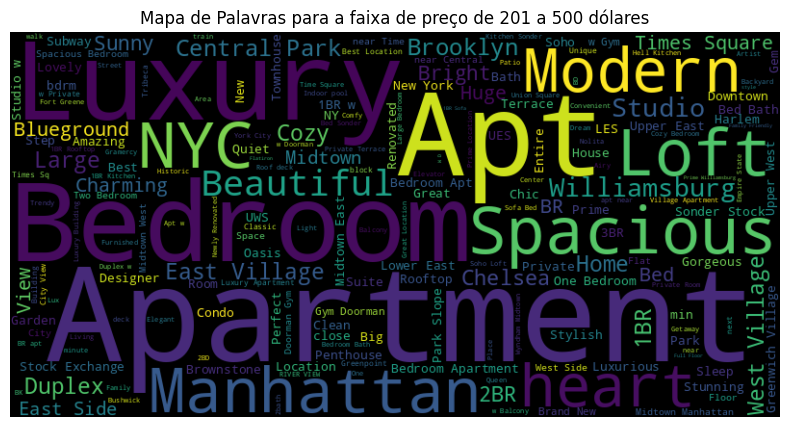

In [164]:
# Filtrando o DataFrame para apenas os locais nesse range de preço
df_filtered = df[df['price_range'] == '201-500']

# Juntando todos os nomes dos locais em uma única string
text = ' '.join(df_filtered['nome'])

# Criando o mapa de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrando o mapa de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palavras para a faixa de preço de 201 a 500 dólares')
plt.show()

O mapa de palavras para a faixa de preço de 201 a 500 dólares mostra:

1. **Localizações:** Palavras como "Manhattan", "Brooklyn", "Williamsburg" e "Central Park" são exibidas de forma proeminente, indicando que essas são áreas populares para propriedades de aluguel nesta faixa de preço.

2. **Tipos de Habitação:** Palavras como "Apartment" (Apartamento), "Studio" (Estúdio), "Duplex" e "Loft" sugerem diferentes tipos de espaços de vida disponíveis nesta faixa de preço.

3. **Qualidades e Comodidades:** Termos descritivos como "Modern" (Moderno), "Spacious" (Espaçoso), "Luxury" (Luxo) e "Beautiful" (Bonito) descrevem a qualidade ou o apelo dos espaços.

4. **Tamanho:** Palavras como "Large" (Grande) e "Huge" (Enorme) podem indicar o tamanho dos espaços de vida disponíveis nesta faixa de preço.




### 5.3.4 Faixa de 501 a 1000 dólares

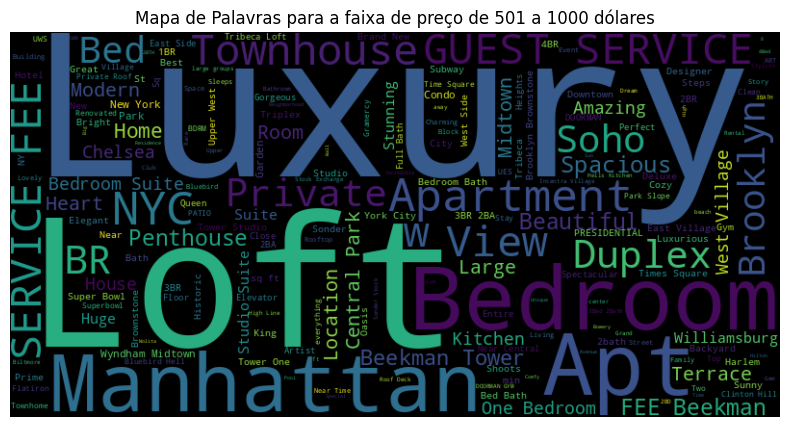

In [165]:
# Filtrando o DataFrame para apenas os locais nesse range de preço
df_filtered = df[df['price_range'] == '501-1000']

# Juntando todos os nomes dos locais em uma única string
text = ' '.join(df_filtered['nome'])

# Criando o mapa de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrando o mapa de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palavras para a faixa de preço de 501 a 1000 dólares')
plt.show()

O mapa de palavras para a faixa de preço de 501 a 1000 dólares mostra várias palavras que são comumente usadas nos nomes dos locais nessa faixa de preço:

1. **Localizações:** Palavras como "Manhattan" e "Brooklyn" são exibidas de forma proeminente, indicando que essas são áreas populares para propriedades de aluguel nesta faixa de preço. Outras localizações específicas, como "Soho", "Chelsea" e "West Village", também são mencionadas.

2. **Tipos de Habitação:** Palavras como "Apt" (Apartamento), "Duplex" e "Townhouse" sugerem diferentes tipos de espaços de vida disponíveis nesta faixa de preço.

3. **Qualidades e Comodidades:** Termos descritivos como "Luxury" (Luxo), "Spacious" (Espaçoso), "View" (Vista) e "Terrace" (Terraço) descrevem a qualidade ou o apelo dos espaços.

4. **Serviços Relacionados:** Palavras como "Service" (Serviço) e "Free" (Grátis) podem estar relacionadas a serviços adicionais ou ofertas fornecidas com os aluguéis.



### 5.3.5 Faixa de 1001 a 2000 dólares

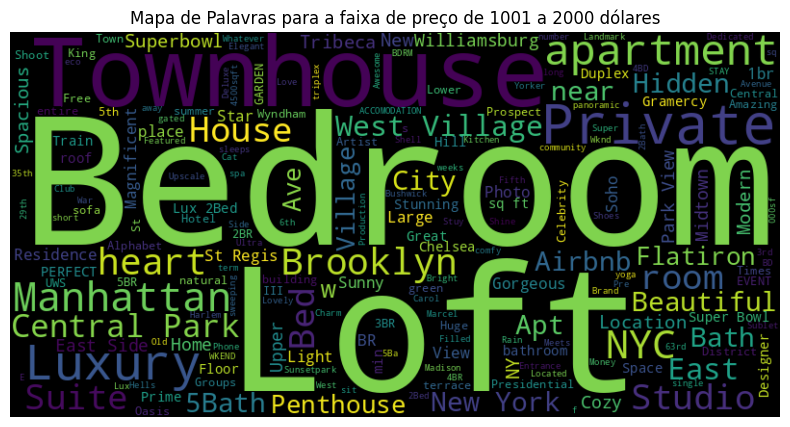

In [166]:
# Filtrando o DataFrame para apenas os locais nesse range de preço
df_filtered = df[df['price_range'] == '1001-2000']

# Juntando todos os nomes dos locais em uma única string
text = ' '.join(df_filtered['nome'])

# Criando o mapa de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrando o mapa de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palavras para a faixa de preço de 1001 a 2000 dólares')
plt.show()

O mapa de palavras para a faixa de preço de 1001 a 2000 dólares mostra várias palavras que são comumente usadas nos nomes dos locais nessa faixa de preço:


1. **Tipos de Habitação:** Palavras como "Loft", "Apartment" (Apartamento), "Private" (Privado), "Bedroom" (Quarto) e "Townhouse" (Casa de cidade) sugerem diferentes tipos de espaços de vida disponíveis nesta faixa de preço.

2. **Localizações:** Palavras como "Manhattan" e "Brooklyn" são exibidas de forma proeminente, indicando que essas são áreas populares para propriedades de aluguel nesta faixa de preço.

3. **Qualidades e Comodidades:** Termos descritivos como "Luxury" (Luxo) e "Spacious" (Espaçoso) descrevem a qualidade ou o apelo dos espaços. A palavra "View" (Vista) pode indicar que algumas dessas propriedades têm uma vista atraente.


5.3.6 Faixa acima de 2000 dólares

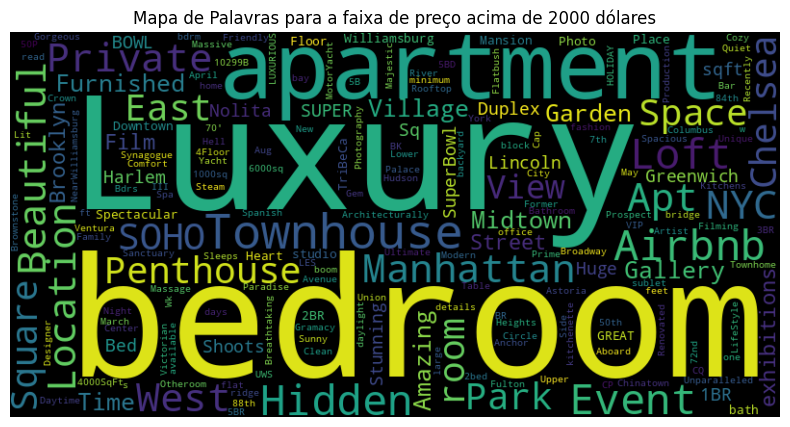

In [167]:
# Filtrando o DataFrame para apenas os locais nesse range de preço
df_filtered = df[df['price_range'] == '2000+']

# Juntando todos os nomes dos locais em uma única string
text = ' '.join(df_filtered['nome'])

# Criando o mapa de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrando o mapa de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palavras para a faixa de preço acima de 2000 dólares')
plt.show()

O mapa de palavras para a faixa de preço acima de 2000 dólares mostra várias palavras que são comumente usadas nos nomes dos locais nessa faixa de preço:

1. **Tipos de Habitação:** Palavras como "Townhouse", "Bedroom" (Quarto) e "Apartment" (Apartamento) sugerem diferentes tipos de espaços de vida disponíveis nesta faixa de preço.

2. **Localizações:** Palavras como "Manhattan" e "Harlem" são exibidas de forma proeminente, indicando que essas são áreas populares para propriedades de aluguel nesta faixa de preço. A palavra "SOHO" também é mencionada, que é um bairro específico em Manhattan conhecido por suas lojas de luxo e arquitetura histórica.

3. **Qualidades e Comodidades:** Termos descritivos como "Lux" (Luxo) e "Beautiful" (Bonito) descrevem a qualidade ou o apelo dos espaços. A palavra "Private" (Privado) pode indicar que algumas dessas propriedades oferecem privacidade adicional.

4. **Eventos Relacionados:** A palavra "SuperBowl" é mencionada, o que pode indicar que algumas propriedades são procuradas para acomodações durante eventos ou para acomodar eventos.




> Essas observações sugerem que, para todas as acomodações, independente de preço, os anfitriões tendem a enfatizar o tipo de acomodação, a localização e certas características desejáveis em seus nomes de locais.

# **6. SUGESTÃO DE PREÇO**

 Supondo um apartamento com as seguintes características:

| Campo | Valor |
| --- | --- |
| id | 2595 |
| nome | Skylit Midtown Castle |
| host_id | 2845 |
| host_name | Jennifer |
| bairro_group | Manhattan |
| bairro | Midtown |
| latitude | 40.75362 |
| longitude | -73.98377 |
| room_type | Entire home/apt |
| price | 225 |
| minimo_noites | 1 |
| numero_de_reviews | 45 |
| ultima_review | 2019-05-21 |
| reviews_por_mes | 0.38 |
| calculado_host_listings_count | 2 |
| disponibilidade_365 | 355 |

Qual seria a sua sugestão de preço?


## 6.1 Base de dados

In [168]:
# Carregando os dados novamente
df = pd.read_csv('teste_indicium_precificacao.csv')

In [ ]:
# Tratando os dado novamente, como feito anteriormente

In [169]:
# Substituindo valores nulos
df['nome'].fillna('Desconhecido', inplace=True)
df['host_name'].fillna('Desconhecido', inplace=True)
df['reviews_por_mes'].fillna(0, inplace=True)

In [170]:
# Convertendo a coluna 'ultima_review' para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'])
df['ano'] = df['ultima_review'].dt.year
df['mes'] = df['ultima_review'].dt.month
df['dia'] = df['ultima_review'].dt.day
df = df.drop('ultima_review', axis=1)

## 6.2 Outliers

Como mencionado anteriormente, a presença de outliers na base de dados original é importante e deve ser considerada. No entanto, para melhorar o desempenho do modelo, os outliers serão tratados especificamente no bairro sugerido, que é 'Midtown' em 'Manhattan'.

In [171]:
# Filtrando os dados para 'Midtown' em 'Manhattan'
df_filtered = df[(df['bairro'] == 'Midtown') & (df['bairro_group'] == 'Manhattan')]

# Definindo Q1 e Q3
Q1 = df_filtered['price'].quantile(0.25)
Q3 = df_filtered['price'].quantile(0.75)

# Calculando o IQR
IQR = Q3 - Q1

# Definindo os limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removendo os outliers
df_filtered = df_filtered[(df_filtered['price'] >= lower_bound) & (df_filtered['price'] <= upper_bound)]


In [172]:
# Convertendo as variáveis categóricas em variáveis dummy através da codificação one-hot
df_final = pd.get_dummies(df_filtered)

## 6.3 Modelagem

### Escolha do Modelo: Random Forest

A escolha do modelo de Random Forest para a previsão de preço neste projeto é baseada em várias razões. A principal é sua Robustez a Outliers, sendo menos sensível a outliers nos dados, pois cada árvore na floresta é treinada em uma amostra aleatória dos dados. Isso torna o modelo mais robusto a variações extremas.



In [173]:
# Definindo X e y a partir do dataframe final
X = df_final.drop('price', axis=1)
y = df_final['price']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando um imputador que substituirá os NaNs pela média da coluna
imputer = SimpleImputer(strategy='mean')

# Ajustando o imputador aos dados de treinamento e transformando os dados
X_train_imputed = imputer.fit_transform(X_train)

# Criando e treinando o modelo de regressão florestal aleatória
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)
model.fit(X_train_imputed, y_train)


RandomForestRegressor(min_samples_split=5, n_estimators=200, random_state=42)

In [174]:
# Características do apartamento
apartment_features = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

# Convertendo para DataFrame
apartment_df = pd.DataFrame([apartment_features])

# Codificando as colunas categóricas
apartment_df_encoded = pd.get_dummies(apartment_df)

# Obtendo as colunas do conjunto de dados de treinamento
train_columns = X_train.columns

# Adicionando colunas faltantes ao conjunto de dados de teste
for column in train_columns:
    if column not in apartment_df_encoded.columns:
        apartment_df_encoded[column] = 0

# Removendo colunas extras do conjunto de dados de teste
for column in apartment_df_encoded.columns:
    if column not in train_columns:
        apartment_df_encoded = apartment_df_encoded.drop(column, axis=1)

# Fazendo a previsão
predicted_price = model.predict(apartment_df_encoded)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



## 6.4 Previsão do valor do apartamento

In [176]:
# Imprimindo a sugestão de preço para o apartamento:
print(f"A sugestão de preço para o apartamento é: ${predicted_price[0]:.2f}")


A sugestão de preço para o apartamento é: $160.57


## 6.5 Avaliando as métricas

In [177]:
# Transformando os dados de teste com o imputador
X_test_imputed = imputer.transform(X_test)

# Fazendo previsões nos dados de teste imputados
y_pred = model.predict(X_test_imputed)

In [178]:
# Calculando as métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")


MSE: 9699.075752153798
RMSE: 98.48388574865331
MAE: 69.49944402947453
R²: 0.307794353576505


- **Erro Quadrático Médio (MSE)**: O MSE é 9699.08. Isso significa que, em média, o quadrado da diferença entre os preços previstos e os reais é 9699.08. Esta é uma medida de erro que dá mais peso a erros grandes.

- **Raiz do Erro Quadrático Médio (RMSE)**: O RMSE é 98.48. Isso significa que, em média, a diferença entre os preços previstos e os reais é de cerca de \$98.48. Esta métrica é útil porque tem a mesma unidade que a variável alvo (preço).

- **Erro Absoluto Médio (MAE)**: O MAE é 69.50. Isso significa que, em média, a diferença absoluta entre os preços previstos e os reais é de \$69.50. Esta métrica dá igual peso a todos os erros, independentemente de sua magnitude.

- **R-quadrado (R²)**: O R² é 0.31. Isso significa que o modelo explica 31% da variância nos preços. Esta métrica indica o quão bem o modelo se ajusta aos dados. Um valor de 1 significa que o modelo explica toda a variância, enquanto um valor de 0 significa que o modelo não explica nada.

Essas métricas sugerem que ainda há espaço para melhorar o modelo. Para isso, aplica-se o ajuste de hiperparâmetros:

In [179]:
# Definindo o modelo
model = RandomForestRegressor(random_state=42)

# Definindo os hiperparâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurando a busca em grade
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Ajustando a busca em grade aos dados
grid_search.fit(X_train_imputed, y_train)

# Obtendo os melhores hiperparâmetros
best_params = grid_search.best_params_

print(f"Os melhores hiperparâmetros são: {best_params}")
#Os novos hipermarâmetros já foram aplicados na modelagem

Os melhores hiperparâmetros são: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# **7. SALVANDO O MODELO**

In [188]:
# Salvando o modelo em um arquivo .pkl
with open('modelo_precificacao.pkl', 'wb') as file:
    pickle.dump(model, file)
